## エルニーニョ

これまで学んだことを応用して，エルニーニョに着目した海面水温データの解析を行う。

### NINO.3

まずは地図の描画を復習する。[エルニーニョ](http://www.data.jma.go.jp/gmd/cpd/data/elnino/learning/faq/faq2.html)の検出を試みる。まずは地図上にNINO.3と呼ばれる海域を図示してみよう。

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/ticker.py:1685: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


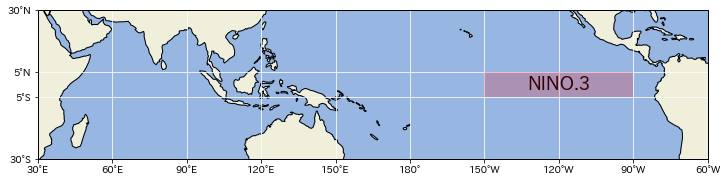

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig = plt.figure(figsize=(12, 5))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.coastlines()
ax.set_extent([30, 300, -30, 30], ccrs.PlateCarree())

xticks = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
yticks = [-30, -5, 5, 30]
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(xlocs=xticks, ylocs=yticks, color='white')

ax.add_patch(pat.Rectangle(xy = [210, -5], width=60, height=10, facecolor='red',
                           alpha=0.2, transform=ccrs.PlateCarree(), zorder=10))

plt.text(240, 0, 'NINO.3', horizontalalignment='center', verticalalignment='center',
         transform=ccrs.Geodetic(), size=18)

plt.show()


### 海面水温変動

ファイルの読み込みや統計をする方法を学び，海面水温変動を見てみよう。NetCDF形式で保存しておいた海面水温データを開く。

In [2]:
import netCDF4 as nc4
nc = nc4.Dataset('HadISST1_SST_1961-1990.nc')

NINO.3で平均を求める。

In [3]:
import numpy as np
sst_nino3 = np.zeros(12 * 30)
for i in range(12*30):
    sst_nino3[i] = nc.variables['sst'][i, 85:95, 30:90].mean()

図示して変動の様子を確認しよう。さらにこのデータ内の最大値，最小値，平均値，標準偏差を計算する。

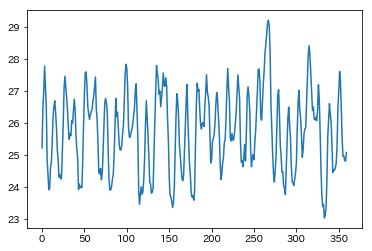

In [4]:
plt.plot(sst_nino3)
plt.show()

In [5]:
sst_nino3.max()

29.21263313293457

In [6]:
sst_nino3.min()

23.031665802001953

In [7]:
sst_nino3.mean()

25.7389995098114

In [8]:
sst_nino3.std()

1.2339356425648902

x軸に日付を入れるために日付要素とする配列を作る。日付の作成には，`datetime`モジュールを用いる。

In [9]:
from datetime import date
dates = np.array([date(y, m+1, 15) for y in range(1961, 1991) for m in range(12)])

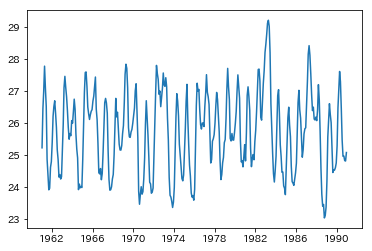

In [10]:
plt.plot(dates, sst_nino3)

plt.show()

### 海面水温偏差

海面水温の平年からのずれ（偏差）を描こう。描くなら一番偏差が大きい月がいいだろう。最大値は何年何月だろうか。

In [11]:
sst_nino3.argmax()

267

In [12]:
dates[sst_nino3.argmax()]

datetime.date(1983, 4, 15)

1983年4月の海面水温と4月の気候値を読み，差をとって海面水温偏差を描いてみよう。

In [13]:
sst_elnino = nc.variables['sst'][sst_nino3.argmax(),:,:]
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]

In [14]:
ncc = nc4.Dataset('HadISST1_SST_1961-1990_clim.nc')
m = dates[sst_nino3.argmax()].month
sst_clim = ncc.variables['sst'][m-1,:,:]

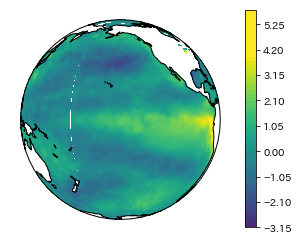

In [15]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=210))

plt.contourf(lon, lat, sst_elnino-sst_clim, 60, transform=ccrs.PlateCarree(), vmin = -4, vmax = 4)
plt.colorbar()

ax.coastlines()

plt.show()

5度を超える高温偏差が東太平洋赤道域にみられる。日付変更線付近が白く抜けてしまった。これを解消するために，東西に周期的に点を追加する。

In [16]:
from cartopy.util import add_cyclic_point

dsst, lonc = add_cyclic_point(sst_elnino-sst_clim, coord=lon)

In [17]:
dsst.shape

(180, 361)

In [18]:
lonc

masked_array(data = [-179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 -172.5 -171.5 -170.5
 -169.5 -168.5 -167.5 -166.5 -165.5 -164.5 -163.5 -162.5 -161.5 -160.5
 -159.5 -158.5 -157.5 -156.5 -155.5 -154.5 -153.5 -152.5 -151.5 -150.5
 -149.5 -148.5 -147.5 -146.5 -145.5 -144.5 -143.5 -142.5 -141.5 -140.5
 -139.5 -138.5 -137.5 -136.5 -135.5 -134.5 -133.5 -132.5 -131.5 -130.5
 -129.5 -128.5 -127.5 -126.5 -125.5 -124.5 -123.5 -122.5 -121.5 -120.5
 -119.5 -118.5 -117.5 -116.5 -115.5 -114.5 -113.5 -112.5 -111.5 -110.5
 -109.5 -108.5 -107.5 -106.5 -105.5 -104.5 -103.5 -102.5 -101.5 -100.5
  -99.5  -98.5  -97.5  -96.5  -95.5  -94.5  -93.5  -92.5  -91.5  -90.5
  -89.5  -88.5  -87.5  -86.5  -85.5  -84.5  -83.5  -82.5  -81.5  -80.5
  -79.5  -78.5  -77.5  -76.5  -75.5  -74.5  -73.5  -72.5  -71.5  -70.5
  -69.5  -68.5  -67.5  -66.5  -65.5  -64.5  -63.5  -62.5  -61.5  -60.5
  -59.5  -58.5  -57.5  -56.5  -55.5  -54.5  -53.5  -52.5  -51.5  -50.5
  -49.5  -48.5  -47.5  -46.5  -45.5  -44.5  -43.5  -42.5 

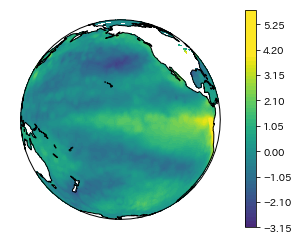

In [19]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=210))

plt.contourf(lonc, lat, dsst, 60, transform=ccrs.PlateCarree(), vmin = -4, vmax = 4)
plt.colorbar()

ax.coastlines()

plt.show()

### エルニーニョ期間の検出

[気象庁による定義](http://www.data.jma.go.jp/gmd/cpd/data/elnino/learning/faq/faq2.html#2)では，海面水温の月平均をさらに5か月の移動平均して気候値からのずれが0.5度以上のときをエルニーニョとしている。気候値は前年までの30年平均値が用いられるが，簡単のため1961年から1990年までの30年平均を気候値とする。

さて，5か月分の移動平均をするには，まず最初の5か月の平均をとり，これを3月の移動平均値とする。4月の移動平均値は，先頭の1月の月平均値/5を引き6月の月平均値/5を足せばよい。あとは同様にひと月ずつずらしていく。

データの最初と最後のの2か月は移動平均値を計算できないので，データの数は4つ少なくなる。

In [20]:
n = sst_nino3.size
sst_nino3_smooth = np.zeros(n - 4)
sst_nino3_smooth[2] = sst_nino3_smooth[0:5].mean()
for i in range(3,n-4):
    sst_nino3_smooth[i] = sst_nino3_smooth[i-1] - sst_nino3[i-3]/5 + sst_nino3[i+2]/5

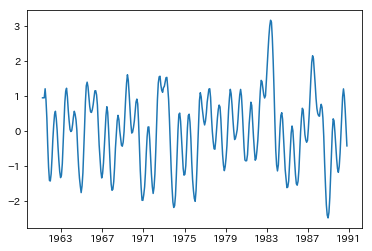

In [21]:
dates_smooth = dates[2:-2]
plt.plot(dates_smooth, sst_nino3_smooth - sst_nino3_smooth.mean())
plt.show()

[畳み込み](https://ja.wikipedia.org/wiki/%E7%95%B3%E3%81%BF%E8%BE%BC%E3%81%BF)を使うと，移動平均値を簡単に計算することができる。Numpyで畳み込みを行う関数は[`numpy.convolve()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html#numpy.convolve)である。

In [22]:
kernel = np.ones(5)/5
sst_nino3_smooth = np.convolve(sst_nino3, kernel, mode='valid')

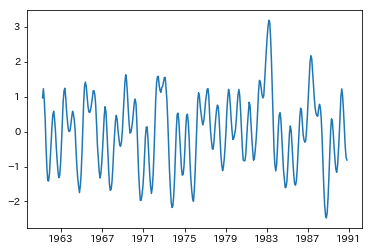

In [23]:
plt.plot(dates_smooth, sst_nino3_smooth - sst_nino3_smooth.mean())
plt.show()

NINO.3の海面水温偏差が0.5度より高いときを`True`，そうでないときを`False`とする配列を作る。

In [24]:
condition = sst_nino3_smooth - sst_nino3_smooth.mean() > 0.5

In [25]:
condition

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

5つ以上`True`が続く期間を見つけるのは人力でもできるが，面倒なことはPythonにやってもらおう。拡張モジュール`itertools`に登場願う。

In [26]:
from itertools import groupby

`groupby`はキーが変わるごとに値をひとまとまりにする。listにして長さを調べてみる。

In [27]:
for key, group in groupby(condition):
    print(key)
    print(list(group))

True
[True, True, True]
False
[False, False, False, False, False, False, False, False, False, False]
True
[True]
False
[False, False, False, False, False, False, False, False, False, False]
True
[True, True, True, True, True]
False
[False, False, False, False, False, False]
True
[True]
False
[False, False, False, False, False, False, False, False, False, False, False, False]
True
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
False
[False, False, False, False, False, False, False, False, False, False]
True
[True, True]
False
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
True
[True, True, True, True, True, True]
False
[False, False, False, False, False]
True
[True, True, True, True]
False
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
True
[Tru

知りたいのは期間なので配列の添え字をまとめるように変更する。キーをconditionの要素にするため無名関数`lambda`を使った。

In [28]:
for key, group in groupby(range(condition.size), lambda i: condition[i]):
    print(key)
    print(list(group))

True
[0, 1, 2]
False
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
True
[13]
False
[14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
True
[24, 25, 26, 27, 28]
False
[29, 30, 31, 32, 33, 34]
True
[35]
False
[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
True
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
False
[63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
True
[73, 74]
False
[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
True
[95, 96, 97, 98, 99, 100]
False
[101, 102, 103, 104, 105]
True
[106, 107, 108, 109]
False
[110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131]
True
[132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145]
False
[146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]
True
[158]
False
[159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
True
[181, 182, 183, 184, 185]
False
[186, 187, 188]
True
[189, 190, 191, 1

In [29]:
for key, group in groupby(range(condition.size), lambda i: condition[i]):
    if (key):
        l = list(group)
        if len(l) >= 6:
            print([l[0], l[-1]])

[48, 62]
[95, 100]
[132, 145]
[189, 194]
[251, 268]
[309, 319]


関数にまとめて，NINO.3の月平均海面水温を与えればエルニーニョの期間が得られるようにする。

In [30]:
from itertools import groupby
def detect_elnino(sst):
    sst_smooth = np.convolve(sst_nino3, np.ones(5)/5, mode='valid')
    condition = sst_smooth - sst_smooth.mean() >= 0.5
    elnino_period = []
    for key, group in groupby(range(condition.size), lambda i: condition[i]):
        if (key):
            l = list(group)
            if len(l) >= 6:
                elnino_period.append([l[0], l[-1]])
    return elnino_period

In [31]:
elnino = detect_elnino(sst_nino3)

エルニーニョの期間が特定できた。

In [32]:
for i in elnino:
    print(dates_smooth[i])

[datetime.date(1965, 3, 15) datetime.date(1966, 5, 15)]
[datetime.date(1969, 2, 15) datetime.date(1969, 7, 15)]
[datetime.date(1972, 3, 15) datetime.date(1973, 4, 15)]
[datetime.date(1976, 12, 15) datetime.date(1977, 5, 15)]
[datetime.date(1982, 2, 15) datetime.date(1983, 7, 15)]
[datetime.date(1986, 12, 15) datetime.date(1987, 10, 15)]


最後にエルニーニョの期間に影をつけたグラフを描く。

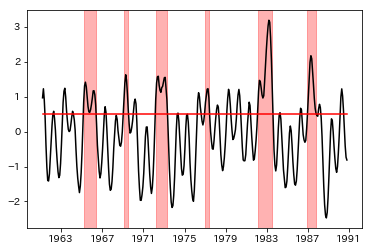

In [33]:
plt.plot(dates_smooth, sst_nino3_smooth - sst_nino3_smooth.mean(), color='black')
plt.plot(dates_smooth, 0.5 * np.ones(sst_nino3_smooth.size), color='red')

for i in elnino:
    plt.axvspan(dates_smooth[i[0]], dates_smooth[i[1]], color='red', alpha=0.3)

plt.show()